In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scorecardpy as sc
from sklearn import metrics
import statsmodels.formula.api as smf
from bioinfokit.analys import stat

In [59]:
#split data into test and training set
data=pd.read_csv('diabetes.csv')
df, df_test = sc.split_df(data.iloc[:,:9],
                          y = 'Outcome',
                          ratio = 0.7,
                          seed = 100).values()


In [60]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
2                     0.672   32        1  
3                     0.167   21        0  
6                     0.248   26        1  
7                     0.134   29        0  
9                     0.232   54        1

In [61]:
df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   538.000000  538.000000     538.000000     538.000000  538.000000   
mean      3.830855  120.167286      68.903346      20.198885   80.200743   
std       3.316234   32.542622      19.513972      15.750955  118.639779   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  116.500000      72.000000      22.000000   15.000000   
75%       6.000000  141.000000      80.000000      32.000000  126.000000   
max      15.000000  199.000000     114.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  538.000000                538.000000  538.000000  538.000000  
mean    31.989219                  0.465775   33.237918    0.349442  
std      8.199954                  0.325866   11.649885    0.477238  
min      0.000000                  0.078000   21.000000    0.000000  
25%     26.925000                  0.238250   24.000000    0.000000  
50%     32.000000                  0.364500   29.000000    0.000000  
75%     36.800000                  0.614750   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [62]:
df_test.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
count   230.000000  230.000000     230.000000     230.000000  230.00000   
mean      3.878261  122.595652      69.578261      21.326087   78.86087   
std       3.498341   30.599497      19.014370      16.421115  107.12372   
min       0.000000   57.000000       0.000000       0.000000    0.00000   
25%       1.000000  100.000000      62.000000       0.000000    0.00000   
50%       3.000000  117.500000      72.000000      25.000000   43.00000   
75%       6.000000  139.750000      80.000000      33.000000  130.00000   
max      17.000000  197.000000     122.000000      99.000000  744.00000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  230.000000                230.000000  230.000000  230.000000  
mean    32.000435                  0.486148   33.247826    0.347826  
std      7.107782                  0.344070   12.040121    0.477319  
min      0.000000                  0.084000   21.000000    0.000000  
25%     28.075000                  0.256000   24.000000    0.000000  
50%     32.500000                  0.392000   29.000000    0.000000  
75%     36.075000                  0.635250   40.000000    1.000000  
max     52.300000                  2.329000   72.000000    1.000000

### About this file

#### Pregnancies: Number of times pregnant

#### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

#### BloodPressure: Diastolic blood pressure (mm Hg)

#### SkinThickness: Triceps skin fold thickness (mm)

#### Insulin: 2-Hour serum insulin (mu U/ml)

#### BMI: Body mass index (weight in kg/(height in m)^2)

#### DiabetesPedigreeFunction: Diabetes pedigree function

#### Age: Age (years)

#### Outcome: Class variable (0 or 1)

It's easy to observe that there are no missing values in this dataset from the summary table. But there are definitely some issues within some of the features. 

From the variable description, we noticed that it is impossible for 'glucose', 'bloodpressure', 'SkinThickness', 'insulin', and 'BMI' to have a value of zero; therefore, these variables need to be treated. 

### Research question:

#### Usually people tested positive for diabetes have a higher index in body mass

# Data preprocessing

In [63]:
#Replace zero with np.na for trainning set
for i in df.index:
    if df.loc[i, 'Glucose'] == 0:
        df.loc[i, 'Glucose'] = np.nan
        
for i in df.index:
    if df.loc[i, 'BloodPressure'] == 0:
        df.loc[i, 'BloodPressure'] = np.nan
        
for i in df.index:
    if df.loc[i, 'SkinThickness'] == 0:
        df.loc[i, 'SkinThickness'] = np.nan
        
for i in df.index:
    if df.loc[i, 'Insulin'] == 0:
        df.loc[i, 'Insulin'] = np.nan
        
for i in df.index:
    if df.loc[i, 'BMI'] == 0:
        df.loc[i, 'BMI'] = np.nan

#Replace zero with np.na for test set
        
for i in df_test.index:
    if df_test.loc[i, 'BloodPressure'] == 0:
        df_test.loc[i, 'BloodPressure'] = np.nan
        
for i in df_test.index:
    if df_test.loc[i, 'SkinThickness'] == 0:
        df_test.loc[i, 'SkinThickness'] = np.nan
        
for i in df_test.index:
    if df_test.loc[i, 'Insulin'] == 0:
        df_test.loc[i, 'Insulin'] = np.nan
        
for i in df_test.index:
    if df_test.loc[i, 'BMI'] == 0:
        df_test.loc[i, 'BMI'] = np.nan

In [64]:
# Summarize again

df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   538.000000  533.000000     513.000000     377.000000  270.000000   
mean      3.830855  121.294559      72.261209      28.824934  159.807407   
std       3.316234   30.528452      12.500859      10.247787  123.812125   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      21.000000   77.250000   
50%       3.000000  117.000000      72.000000      29.000000  126.000000   
75%       6.000000  141.000000      80.000000      36.000000  199.000000   
max      15.000000  199.000000     114.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  530.000000                538.000000  538.000000  538.000000  
mean    32.472075                  0.465775   33.237918    0.349442  
std      7.248939                  0.325866   11.649885    0.477238  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.225000                  0.238250   24.000000    0.000000  
50%     32.000000                  0.364500   29.000000    0.000000  
75%     36.975000                  0.614750   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

From the above table, we observed that almost half of the observations have a missing value in the feature of 'Insulin', and we do not have any backup data resource. It is hard to fill all these missing values with existing data; hence, we need to drop this variable

In [65]:
#Drop Insulin
df=df.drop('Insulin', axis=1)

#Replace with median for the rest for training set
df.fillna(df.median(), inplace=True)

#For test set
df_test.fillna(df_test.median(), inplace=True)

In [66]:
df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   538.000000  538.000000     538.000000     538.000000  538.000000   
mean      3.830855  121.254647      72.249071      28.877323   32.465056   
std       3.316234   30.388794      12.206527       8.575430    7.194968   
min       0.000000   44.000000      24.000000       7.000000   18.200000   
25%       1.000000   99.000000      64.000000      24.000000   27.300000   
50%       3.000000  117.000000      72.000000      29.000000   32.000000   
75%       6.000000  141.000000      80.000000      32.000000   36.800000   
max      15.000000  199.000000     114.000000      63.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                538.000000  538.000000  538.000000  
mean                   0.465775   33.237918    0.349442  
std                    0.325866   11.649885    0.477238  
min                    0.078000   21.000000    0.000000  
25%                    0.238250   24.000000    0.000000  
50%                    0.364500   29.000000    0.000000  
75%                    0.614750   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

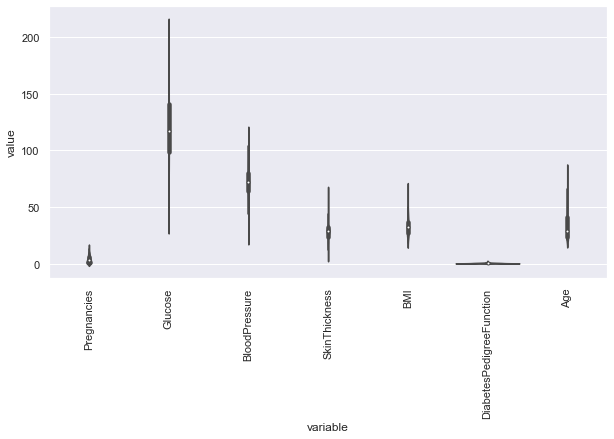

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(df.iloc[:, np.r_[0:7]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

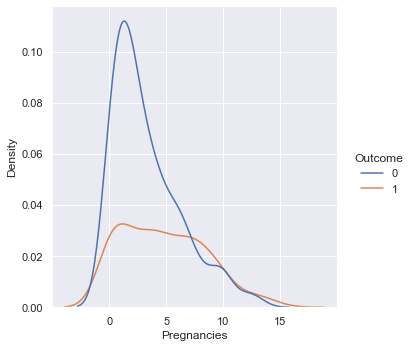

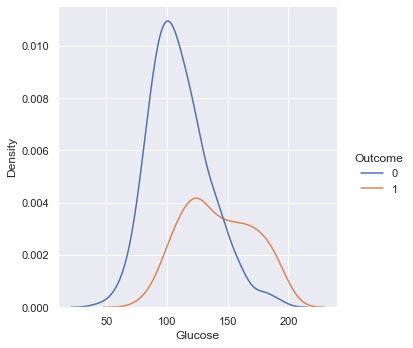

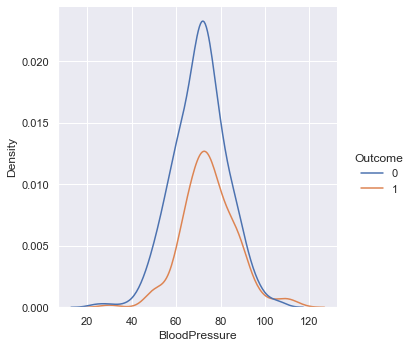

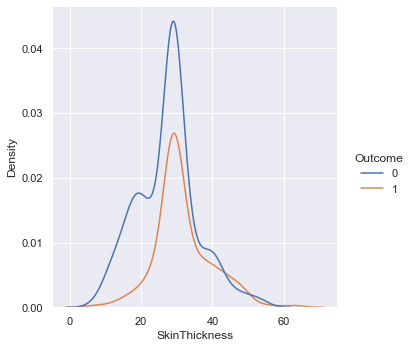

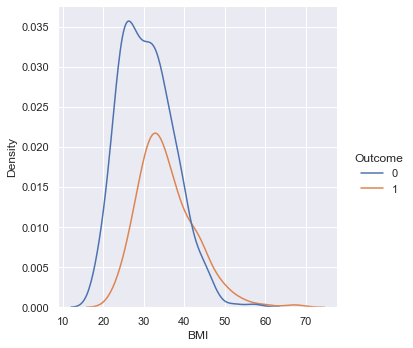

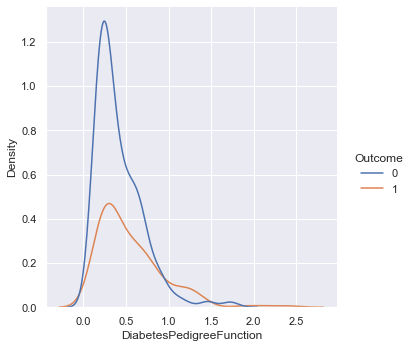

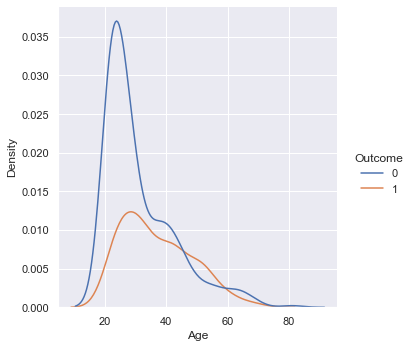

In [68]:
sns.set(color_codes=True)

for col_id in df.columns[np.r_[0:7]]:
    sns.displot(data = df, x = col_id, hue = "Outcome", kind = 'kde')

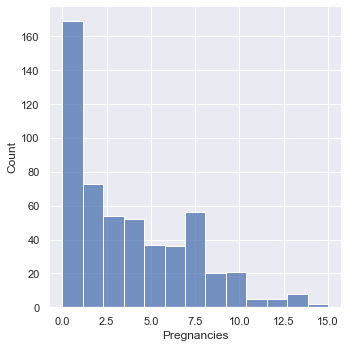

In [69]:
fig = sns.displot(df['Pregnancies'], kind = 'hist')
plt.show()

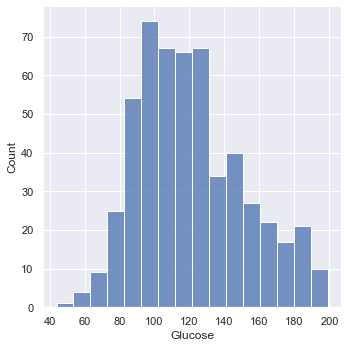

In [70]:
fig = sns.displot(df['Glucose'], kind = 'hist')
plt.show()

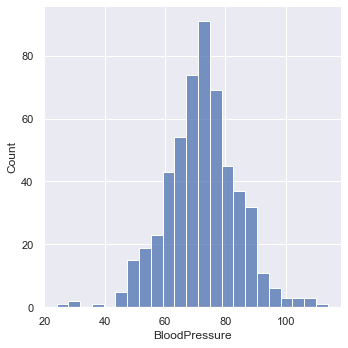

In [71]:
fig = sns.displot(df['BloodPressure'], kind = 'hist')
plt.show()

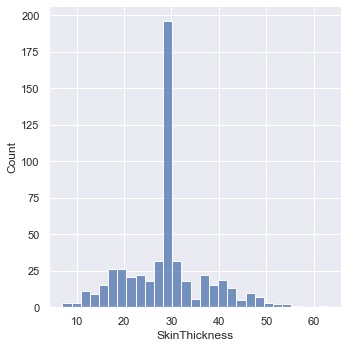

In [72]:
fig = sns.displot(df['SkinThickness'], kind = 'hist')
plt.show()

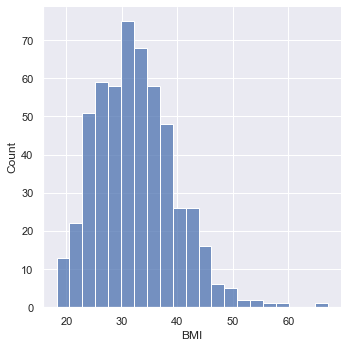

In [73]:
fig = sns.displot(df['BMI'], kind = 'hist')
plt.show()

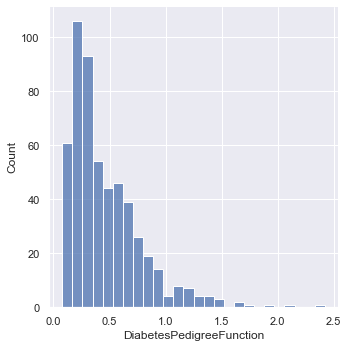

In [74]:
fig = sns.displot(df['DiabetesPedigreeFunction'], kind = 'hist')
plt.show()

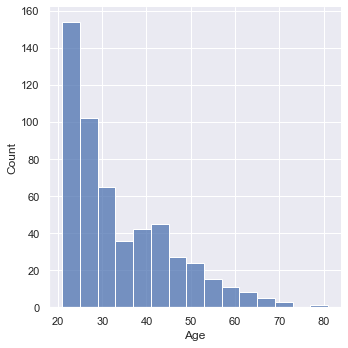

In [75]:
fig = sns.displot(df['Age'], kind = 'hist')
plt.show()

<AxesSubplot:>

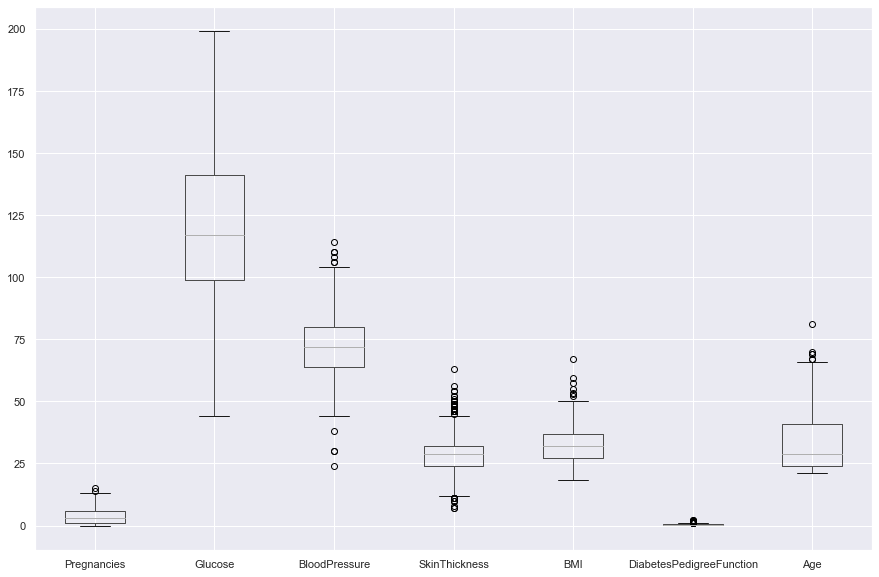

In [76]:
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age'], figsize=(15,10))

In [77]:
# In pregnancy, we noticed that few observations have crazy amount of times of pregnancies and it was not within two sd from the mean
# cut-off: 11
df = df.loc[df['Pregnancies'] <= 11]

#Glucose is fine

#Blood pressure does not have many outliers, we will keep those outliers since they are just the real life situation and we want to make sure our model learn some of that

#SkinThickness has outliers problems.
#From the distribution plot we noticed that most of the observations of this feature are located around the mean. 
#Need to exclude the extreme outliers
#cut-off: 10, 50
df = df.loc[df['SkinThickness'] < 50]
df = df.loc[df['SkinThickness'] >= 10]

#BMI
#From the distribution plot we noticed that there are very extreme outliers on the right side. 
#cut-off: 53
df = df.loc[df['BMI'] <= 53]

#DiabetesPedigreeFunction
#From distribution plot, extreme outliers on the right side. 
# cut-off: 1.2
df = df.loc[df['DiabetesPedigreeFunction'] <= 1.2]

#Age
#Even though the plot is very right skewed, we would do nothing to this variable. 80 years old still makes sense

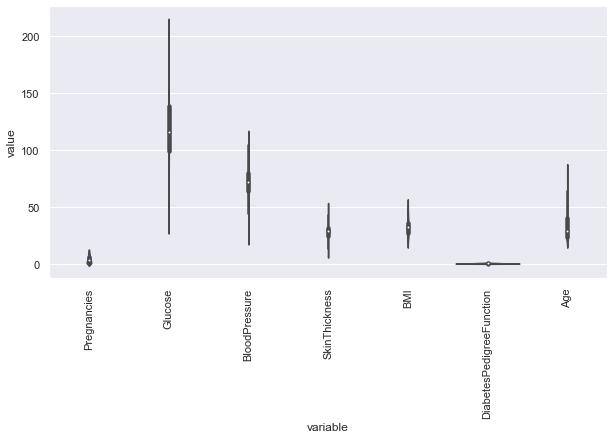

In [78]:
#Violin plot
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(df.iloc[:, np.r_[0:7]]), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [56]:
# Based on our distribution plot, we can try to alter the column of blood pressure into a ategorical form to better fit the midterm's needs. 
# <= 60: Low
# >60 and <=85: Mid
# >85: Hi

#For train
for i in df.index:
    if df['BloodPressure'][i] <= 60:
        df['BloodPressure'][i] = 'Low'
    elif df['BloodPressure'][i] >60 and df['BloodPressure'][i] <=85:
        df['BloodPressure'][i] = 'Mid'
    else:
        df['BloodPressure'][i] = 'Hi'
        
#For test

for i in df_test.index:
    if df_test['BloodPressure'][i] <= 60:
        df_test['BloodPressure'][i] = 'Low'
    elif df_test['BloodPressure'][i] >60 and df_test['BloodPressure'][i] <=85:
        df_test['BloodPressure'][i] = 'Mid'
    else:
        df_test['BloodPressure'][i] = 'Hi'

C:\Users\zhyim\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\zhyim\AppData\Local\Temp/ipykernel_1492/2561907598.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['BloodPressure'][i] = 'Mid'


In [24]:
df.describe(include='all')

Pregnancies     Glucose BloodPressure  SkinThickness         BMI  \
count    490.000000  490.000000           490     490.000000  490.000000   
unique          NaN         NaN             3            NaN         NaN   
top             NaN         NaN           Mid            NaN         NaN   
freq            NaN         NaN           338            NaN         NaN   
mean       3.612245  120.536735           NaN      28.442857   32.062449   
std        2.956510   29.955585           NaN       7.781644    6.698400   
min        0.000000   44.000000           NaN      10.000000   18.200000   
25%        1.000000   99.000000           NaN      24.250000   27.225000   
50%        3.000000  116.000000           NaN      29.000000   32.000000   
75%        6.000000  139.000000           NaN      31.750000   36.075000   
max       11.000000  198.000000           NaN      49.000000   52.900000   

        DiabetesPedigreeFunction         Age     Outcome  
count                 490.000000  490.000000  490.000000  
unique                       NaN         NaN         NaN  
top                          NaN         NaN         NaN  
freq                         NaN         NaN         NaN  
mean                    0.420929   32.879592    0.330612  
std                     0.245285   11.589775    0.470914  
min                     0.078000   21.000000    0.000000  
25%                     0.236000   24.000000    0.000000  
50%                     0.344000   29.000000    0.000000  
75%                     0.586750   40.000000    1.000000  
max                     1.191000   81.000000    1.000000

In [25]:
df_test.describe(include='all')

Pregnancies     Glucose BloodPressure  SkinThickness     Insulin  \
count    230.000000  230.000000           230     230.000000  230.000000   
unique          NaN         NaN             3            NaN         NaN   
top             NaN         NaN           Mid            NaN         NaN   
freq            NaN         NaN           166            NaN         NaN   
mean       3.878261  122.595652           NaN      30.078261  134.165217   
std        3.498341   30.599497           NaN       9.267988   79.424670   
min        0.000000   57.000000           NaN       8.000000   15.000000   
25%        1.000000  100.000000           NaN      26.000000  116.000000   
50%        3.000000  117.500000           NaN      30.500000  120.000000   
75%        6.000000  139.750000           NaN      33.000000  130.000000   
max       17.000000  197.000000           NaN      99.000000  744.000000   

               BMI  DiabetesPedigreeFunction         Age     Outcome  
count   230.000000                230.000000  230.000000  230.000000  
unique         NaN                       NaN         NaN         NaN  
top            NaN                       NaN         NaN         NaN  
freq           NaN                       NaN         NaN         NaN  
mean     32.426957                  0.486148   33.247826    0.347826  
std       6.076928                  0.344070   12.040121    0.477319  
min      19.600000                  0.084000   21.000000    0.000000  
25%      28.500000                  0.256000   24.000000    0.000000  
50%      32.700000                  0.392000   29.000000    0.000000  
75%      36.075000                  0.635250   40.000000    1.000000  
max      52.300000                  2.329000   72.000000    1.000000

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

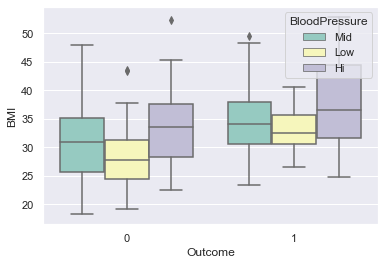

In [26]:
sns.boxplot(x="Outcome", y="BMI", hue = "BloodPressure", data=df, palette="Set3")

48 observations are excluded

<AxesSubplot:>

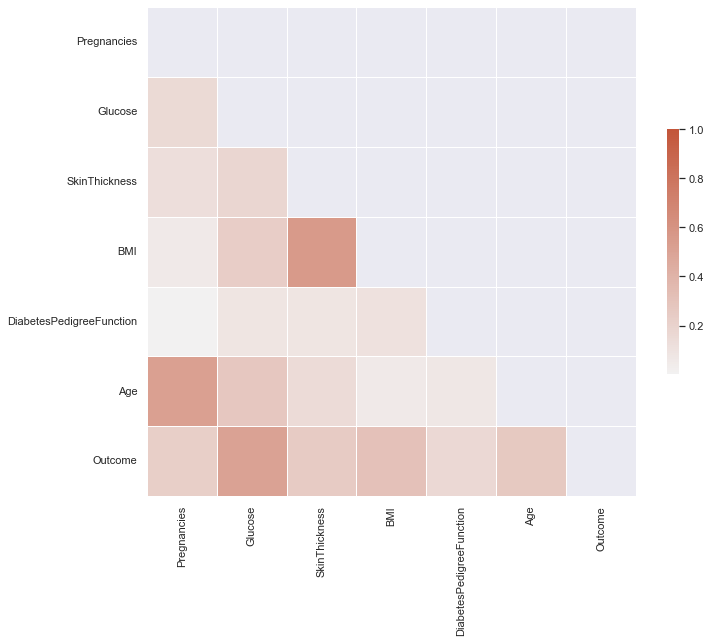

In [27]:
#Check correlation
corr = np.abs(df.corr())
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Modeling stage

In [28]:
mlregression=smf.ols('BMI~BloodPressure+Outcome+BloodPressure:Outcome', data=df)
m=mlregression.fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     15.91
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.60e-14
Time:                        13:39:00   Log-Likelihood:                -1589.4
No. Observations:                 490   AIC:                             3191.
Df Residuals:                     484   BIC:                             3216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

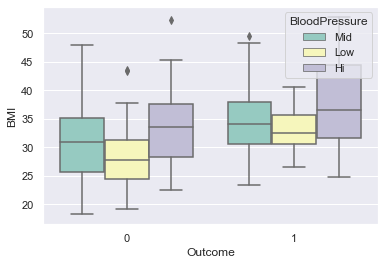

In [29]:
sns.boxplot(x="Outcome", y="BMI", hue = "BloodPressure", data=df, palette="Set3")

In [30]:
y_true=df_test['BMI']
x_test=df_test.iloc[:,[2,8]]
pred=m.predict(x_test)
pred

0      34.500847
1      30.819091
4      33.250000
5      30.819091
8      34.500847
         ...    
756    33.115385
758    30.819091
759    38.050000
764    30.819091
765    30.819091
Length: 230, dtype: float64

In [31]:
print("MSE:", metrics.mean_squared_error(y_true, pred))
print("MAE:", metrics.mean_absolute_error(y_true, pred))

MSE: 33.18117092515151
MAE: 4.552819490752429


$$
H_0: \beta_{outcome}=0~~~~~H_a: \beta_{outcome}\ne 0\\
P(T >|t|)=0.001
$$

Considering a significance level of 0.05
Based on the above outcome of the hypothesis test, we would reject our null hypothesis since P=0.001 < alpha=0.05.
Hence, The variable outcome is important to our response.

Notice that the outcome predictor has a positive coefficient.

In [32]:
#Anova table
anv=sm.stats.anova_lm(m, typ=2)
anv

sum_sq     df          F        PR(>F)
BloodPressure            906.261783    2.0  11.638626  1.156628e-05
Outcome                 1695.173015    1.0  43.540365  1.092072e-10
BloodPressure:Outcome     30.647212    2.0   0.393585  6.748494e-01
Residual               18843.749633  484.0        NaN           NaN

From this anova table, it was easy to observe that main effects have a p-value>0.05 for f-test, but the interaction effect has a p-value = 0.674 > 0.05. Hence, we would not reject the null hypothesis only for the interaction term and rather consider a model without the interaction effect. 

### Post-hoc tukey test

In [29]:
res=stat()
res.tukey_hsd(df=df, res_var='BMI',xfac_var='BloodPressure', anova_model='BMI~BloodPressure+Outcome+BloodPressure:Outcome')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1 group2      Diff     Lower     Upper   q-value  p-value
0    Mid    Low  2.871908  1.074847  4.668968  5.313502    0.001
1    Mid     Hi  3.156432  1.218523  5.094341  5.415469    0.001
2    Low     Hi  6.028339  3.638453  8.418226  8.386746    0.001

In [30]:
res=stat()
res.tukey_hsd(df=df, res_var='BMI',xfac_var='Outcome', anova_model='BMI~BloodPressure+Outcome+BloodPressure:Outcome')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


group1  group2     Diff     Lower     Upper   q-value  p-value
0       1       0  4.46311  3.285775  5.640445  10.53387    0.001

In [33]:
res=stat()
res.tukey_hsd(df=df, res_var='BMI',xfac_var=['BloodPressure', 'Outcome'], anova_model='BMI~BloodPressure+Outcome+BloodPressure:Outcome')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:369: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]


group1    group2      Diff     Lower      Upper   q-value   p-value
0   (Mid, 1)  (Mid, 0)  3.681757  1.644676   5.718837  7.313126  0.001000
1   (Mid, 1)  (Low, 1)  1.250847 -3.795582   6.297276  1.002943  0.900000
2   (Mid, 1)  (Low, 0)  6.083456  3.377894   8.789018  9.098067  0.001000
3   (Mid, 1)   (Hi, 1)  3.549153 -0.101172   7.199477  3.934137  0.062218
4   (Mid, 1)   (Hi, 0)  1.385463 -1.911991   4.682917  1.700092  0.814344
5   (Mid, 0)  (Low, 1)  2.430909 -2.489880   7.351699  1.998896  0.692707
6   (Mid, 0)  (Low, 0)  2.401700 -0.061589   4.864988  3.945115  0.060924
7   (Mid, 0)   (Hi, 1)  7.230909  3.756346  10.705473  8.420713  0.001000
8   (Mid, 0)   (Hi, 0)  2.296294 -0.805468   5.398056  2.995541  0.279627
9   (Low, 1)  (Low, 0)  4.832609 -0.400415  10.065632  3.736674  0.089077
10  (Low, 1)   (Hi, 1)  4.800000 -0.978351  10.578351  3.361194  0.166625
11  (Low, 1)   (Hi, 0)  0.134615 -5.427549   5.696780  0.097928  0.900000
12  (Low, 0)   (Hi, 1)  9.632609  5.728385  13.536832  9.983102  0.001000
13  (Low, 0)   (Hi, 0)  4.697993  1.121501   8.274485  5.315099  0.002628
14   (Hi, 1)   (Hi, 0)  4.934615  0.599169   9.270062  4.605489  0.015215

Based on the above post  hoc test result, we observed that all the main effects have a p-value smaller than 0.05; however, most interaction effects have a p-value >= 0.05. This proved our previous anova table F-test result. There is no evidence showing that the interaction effect is significant. 

In [33]:
mlregression=smf.ols('BMI~BloodPressure+Outcome', data=df)
m=mlregression.fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     26.32
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           8.65e-16
Time:                        13:39:24   Log-Likelihood:                -1589.8
No. Observations:                 490   AIC:                             3188.
Df Residuals:                     486   BIC:                             3204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               33.5172 

In [34]:
y_true=df_test['BMI']
x_test=df_test.iloc[:,[2,8]]
pred=m.predict(x_test)
pred

0      34.714754
1      30.704359
4      32.566473
5      30.704359
8      34.714754
         ...    
756    33.517220
758    30.704359
759    37.527614
764    30.704359
765    30.704359
Length: 230, dtype: float64

In [35]:
print("MSE:", metrics.mean_squared_error(y_true, pred))
print("MAE:", metrics.mean_absolute_error(y_true, pred))

MSE: 33.22423519185774
MAE: 4.560351415905224


The error did not change much, this will be our final model. 

Back to our research question, based on the above result(t-test, modeling coefficients, anova), there is enough evidence supporting the statement made by our research question, that is, usually people tested positive for diabetes have a higher index in body mass.